#Week 4 Assignment - Redo of Visualizations

In [1]:
import pandas as pd
import geopandas as gpd
import folium

In [23]:
tracts = gpd.read_file("2020_Census_Tracts (1).geojson")
poverty = pd.read_excel("Below 100% Poverty Threshold - 2020.xlsx")
heart_disease = pd.read_excel("Coronary Heart Disease - 2020.xlsx")
snap_acceptance = pd.read_excel("SNAP Acceptance Rate - 2022.xlsx")

In [24]:
tracts.head()

,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry
0,4992,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.29793 34.26323, -118.30082 34.2..."
1,4993,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.27743 34.25991, -118.27743 34.2..."
2,4994,101220,1012.20,7.522093e+06,12698.783810,"POLYGON ((-118.27818 34.25577, -118.27887 34.2..."
3,4995,101221,1012.21,3.812000e+06,9161.710543,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,4996,101222,1012.22,3.191371e+06,9980.600461,"POLYGON ((-118.28594 34.25590, -118.28697 34.2..."


In [25]:
poverty.head()

,geoid,geoid20,year,denom_known_poverty,pop_below_100_count,pop_below_100_pct,pop_below_200_count,pop_below_200_pct
0,1400000US06037101110,101110,2020,3845,434,11.287386,1028,26.736021
1,1400000US06037101122,101122,2020,4086,181,4.429760,429,10.499266
2,1400000US06037101220,101220,2020,3775,638,16.900661,1313,34.781456
3,1400000US06037101221,101221,2020,3757,774,20.601543,1650,43.918018
4,1400000US06037101222,101222,2020,2717,1033,38.019875,1811,66.654396


In [26]:
heart_disease.head()

,geoid,geoid20,year,denom_pop_18_over,mental_health_pct,mental_health_count,physical_health_pct,physical_health_count,diabetes_pct,diabetes_count,...,cancer_pct,cancer_count,copd_pct,copd_count,chd_pct,chd_count,smoking_pct,smoking_count,binge_drinking_pct,binge_drinking_count
0,1400000US06037101110,101110,2020,3409.0,16.309769,556.0,10.794954,368.0,9.504253,324.0,...,5.485480,187.0,6.600176,225.0,5.485480,187.0,12.789675,436.0,18.392490,627.0
1,1400000US06037101122,101122,2020,2976.0,13.911290,414.0,8.702957,259.0,8.299731,247.0,...,6.283602,187.0,5.409946,161.0,5.107527,152.0,9.711021,289.0,18.313171,545.0
2,1400000US06037101220,101220,2020,2951.0,16.807861,496.0,11.995934,354.0,10.606574,313.0,...,5.489665,162.0,7.387326,218.0,6.201288,183.0,13.893596,410.0,17.790579,525.0
3,1400000US06037101221,101221,2020,2649.0,18.384296,487.0,12.306531,326.0,9.890525,262.0,...,4.605512,122.0,7.399018,196.0,5.587014,148.0,15.288788,405.0,18.610796,493.0
4,1400000US06037101222,101222,2020,2218.0,18.394951,408.0,12.308386,273.0,9.918846,220.0,...,4.598738,102.0,7.394049,164.0,5.590622,124.0,15.284039,339.0,18.620378,413.0


In [27]:
snap_acceptance.head()

,geoid,geoid20,year,total_pop,snap_accepting_count,snap_rate
0,1400000US06037101122,101122,2022,4247,1,2.354603
1,1400000US06037101220,101220,2022,3583,3,8.372872
2,1400000US06037101221,101221,2022,3723,1,2.686006
3,1400000US06037101222,101222,2022,2690,2,7.434944
4,1400000US06037101300,101300,2022,4068,5,12.291052


Subsetting columns of interest

In [28]:
tracts = tracts[["CT20", "ShapeSTArea", "ShapeSTLength", "geometry"]]
poverty = poverty[["geoid20", "pop_below_100_pct", "pop_below_200_pct"]]
heart_disease = heart_disease[["geoid20", "mental_health_pct", "physical_health_pct", "diabetes_pct", "cancer_pct", "copd_pct",
                "chd_pct", "smoking_pct", "binge_drinking_pct"]]
snap_acceptance = snap_acceptance[["geoid20", "total_pop", "snap_rate"]]

Renaming and coercing types for merging

In [43]:
tracts_new = tracts.rename(columns={"CT20": "geoid20"}, errors="raise")
tracts_new.head()
tracts_new['geoid20'] = tracts_new['geoid20'].astype('int')
poverty.dtypes

geoid20                int64
pop_below_100_pct    float64
pop_below_200_pct    float64
dtype: object

In [45]:
joined = tracts_new.merge(poverty, how = "outer", on = 'geoid20')
joined = joined.merge(heart_disease, how = "outer", on = 'geoid20')
joined = joined.merge(snap_acceptance, how = "outer", on = 'geoid20')

In [46]:
joined.head()

,geoid20,ShapeSTArea,ShapeSTLength,geometry,pop_below_100_pct,pop_below_200_pct,mental_health_pct,physical_health_pct,diabetes_pct,cancer_pct,copd_pct,chd_pct,smoking_pct,binge_drinking_pct,total_pop,snap_rate
0,101110,1.229562e+07,15083.854287,"POLYGON ((-118.29793 34.26323, -118.30082 34.2...",11.287386,26.736021,16.309769,10.794954,9.504253,5.485480,6.600176,5.485480,12.789675,18.392490,NaN,NaN
1,101122,2.845774e+07,31671.455844,"POLYGON ((-118.27743 34.25991, -118.27743 34.2...",4.429760,10.499266,13.911290,8.702957,8.299731,6.283602,5.409946,5.107527,9.711021,18.313171,4247.0,2.354603
2,101220,7.522093e+06,12698.783810,"POLYGON ((-118.27818 34.25577, -118.27887 34.2...",16.900661,34.781456,16.807861,11.995934,10.606574,5.489665,7.387326,6.201288,13.893596,17.790579,3583.0,8.372872
3,101221,3.812000e+06,9161.710543,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",20.601543,43.918018,18.384296,12.306531,9.890525,4.605512,7.399018,5.587014,15.288788,18.610796,3723.0,2.686006
4,101222,3.191371e+06,9980.600461,"POLYGON ((-118.28594 34.25590, -118.28697 34.2...",38.019875,66.654396,18.394951,12.308386,9.918846,4.598738,7.394049,5.590622,15.284039,18.620378,2690.0,7.434944


Scatter plots to detect correlations, using columns as fill in the last two

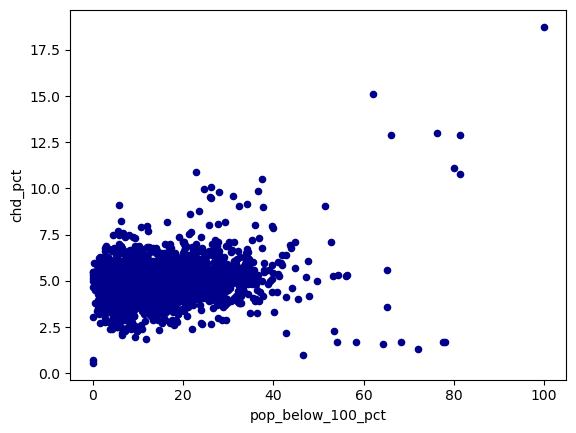

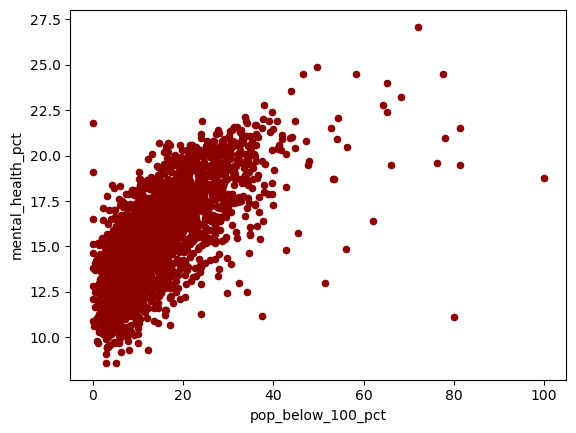

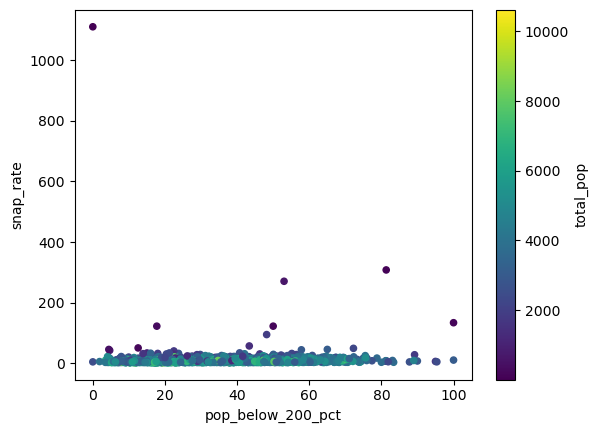

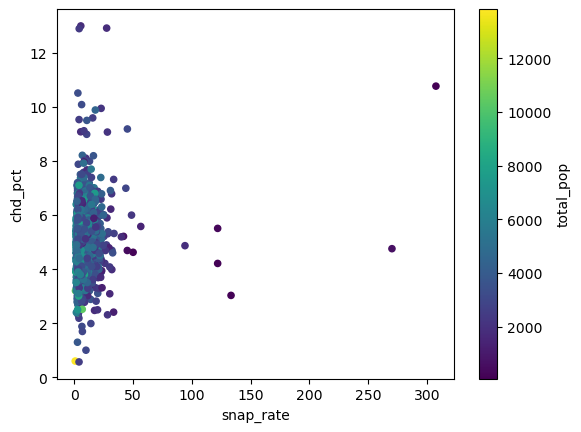

In [54]:
f1 = joined.plot.scatter(x='pop_below_100_pct',
                      y='chd_pct',
                      c='DarkBlue')
f2 = joined.plot.scatter(x='pop_below_100_pct',
                      y='mental_health_pct',
                      c='DarkRed')
f3 = joined.plot.scatter(x='pop_below_200_pct',
                      y='snap_rate',
                      c='total_pop')
f4 = joined.plot.scatter(x='snap_rate',
                      y='chd_pct',
                      c='total_pop')

Sorting by % with mental illness

<Axes: title={'center': 'Top 20 Census Tracts for Mental Illness, Los Angeles County in 2020'}, xlabel='geoid20'>

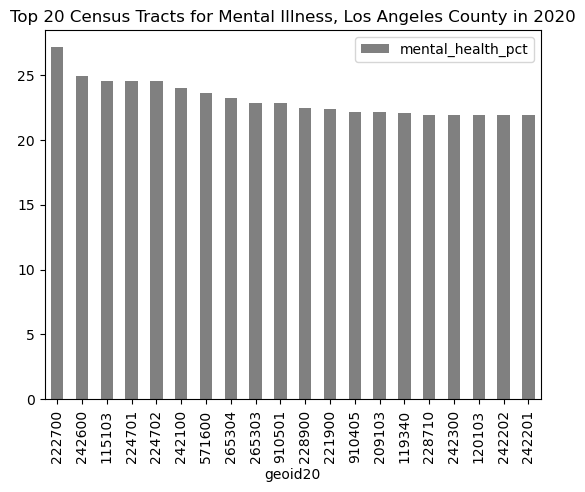

In [69]:
joined_sorted = joined.sort_values(by='mental_health_pct', ascending = False)
joined_sorted.head(20).plot.bar(x='geoid20',
                            y='mental_health_pct', 
                            title='Top 20 Census Tracts for Mental Illness, Los Angeles County in 2020',
                            color='gray')

Creating FIPS column

In [79]:
joined['geoid20'] = joined['geoid20'].astype('str')
joined['FIPS'] = '06' + '037' + joined['geoid20']
joined.head()

,geoid20,ShapeSTArea,ShapeSTLength,geometry,pop_below_100_pct,pop_below_200_pct,mental_health_pct,physical_health_pct,diabetes_pct,cancer_pct,copd_pct,chd_pct,smoking_pct,binge_drinking_pct,total_pop,snap_rate,FIPS
0,101110,1.229562e+07,15083.854287,"POLYGON ((-118.29793 34.26323, -118.30082 34.2...",11.287386,26.736021,16.309769,10.794954,9.504253,5.485480,6.600176,5.485480,12.789675,18.392490,NaN,NaN,06037101110
1,101122,2.845774e+07,31671.455844,"POLYGON ((-118.27743 34.25991, -118.27743 34.2...",4.429760,10.499266,13.911290,8.702957,8.299731,6.283602,5.409946,5.107527,9.711021,18.313171,4247.0,2.354603,06037101122
2,101220,7.522093e+06,12698.783810,"POLYGON ((-118.27818 34.25577, -118.27887 34.2...",16.900661,34.781456,16.807861,11.995934,10.606574,5.489665,7.387326,6.201288,13.893596,17.790579,3583.0,8.372872,06037101220
3,101221,3.812000e+06,9161.710543,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",20.601543,43.918018,18.384296,12.306531,9.890525,4.605512,7.399018,5.587014,15.288788,18.610796,3723.0,2.686006,06037101221
4,101222,3.191371e+06,9980.600461,"POLYGON ((-118.28594 34.25590, -118.28697 34.2...",38.019875,66.654396,18.394951,12.308386,9.918846,4.598738,7.394049,5.590622,15.284039,18.620378,2690.0,7.434944,06037101222


Exploratory plots of mental illness distribution and coronary heart disease

<Axes: >

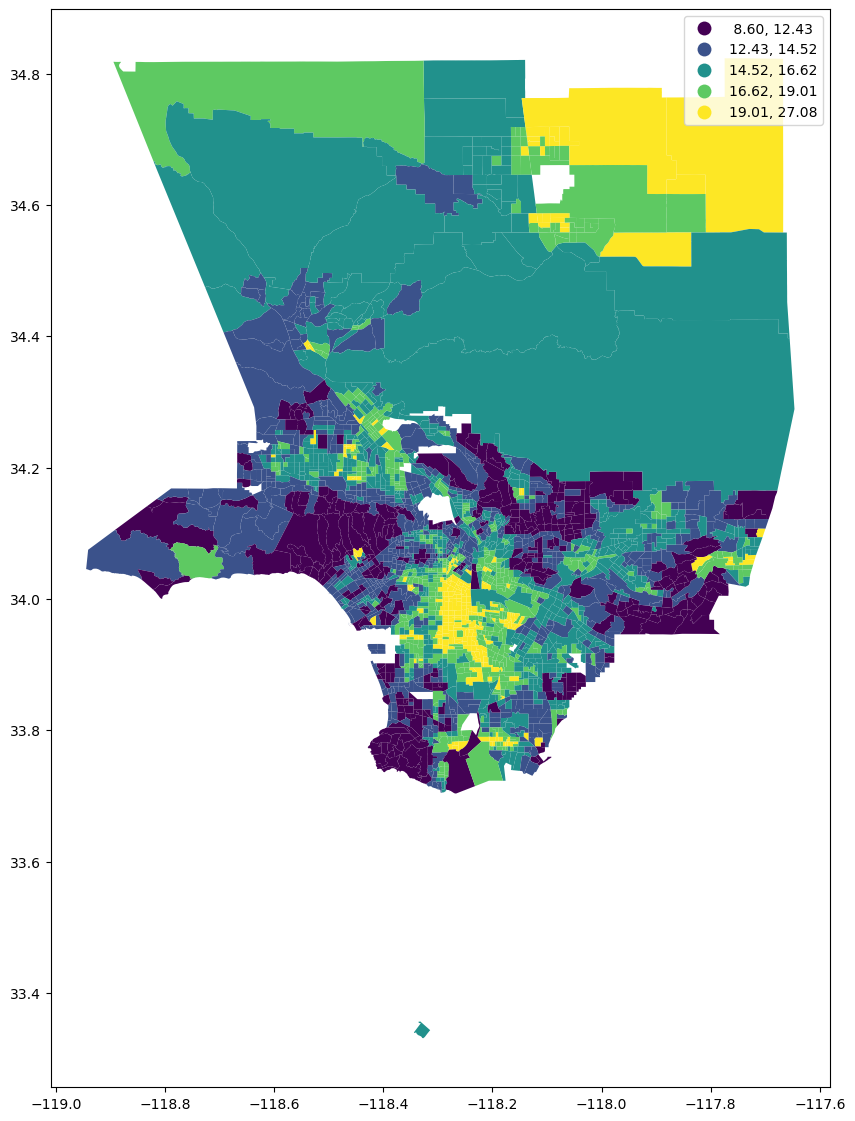

In [87]:
joined.plot(figsize=(12,14),
                 column='mental_health_pct',
                 legend=True, 
                 scheme='NaturalBreaks')

<Axes: >

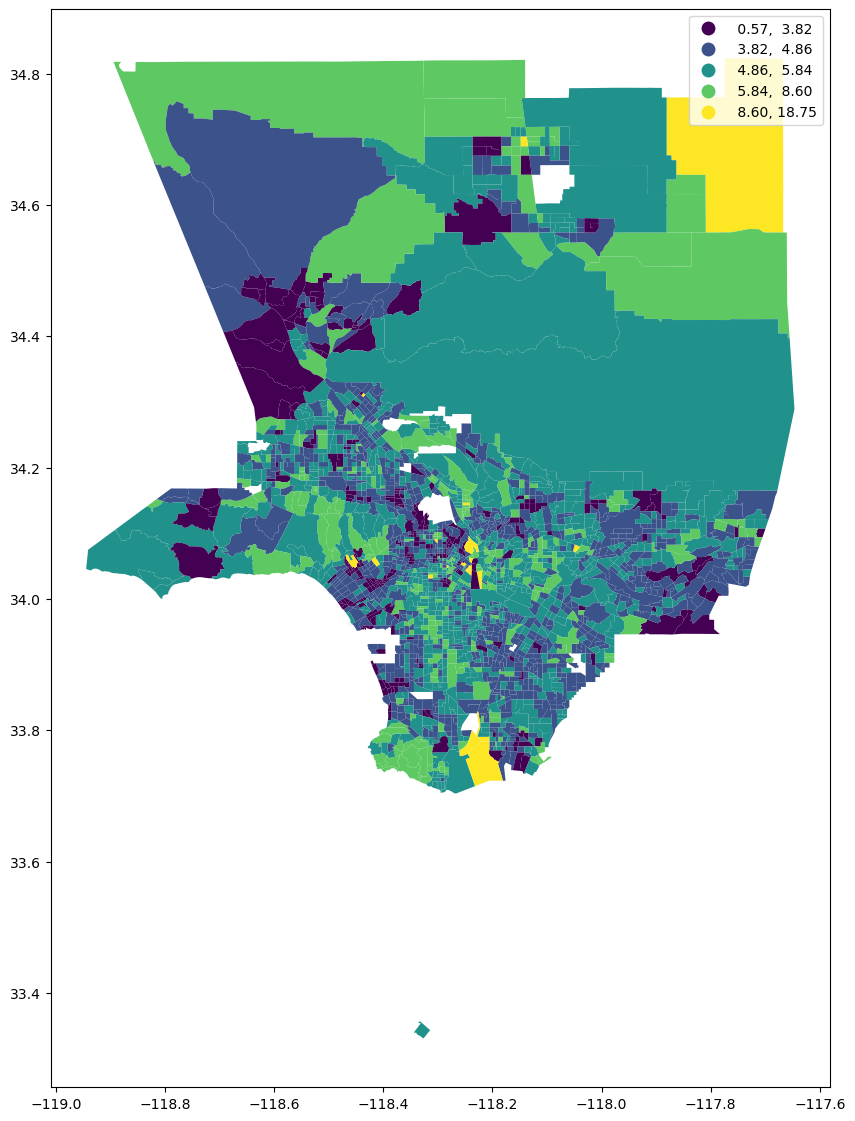

In [86]:
joined.plot(figsize=(12,14),
                 column='chd_pct',
                 legend=True, 
                 scheme='NaturalBreaks')